<a href="https://colab.research.google.com/github/shanmuga2004/4Bit_Adder_nclaunch_sim/blob/main/SITD_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries:**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

**Define Data Paths:**

In [ ]:
# Data Paths
no_tumor_dir = '/content/.config/no_MRI_images'
yes_tumor_dir = '/content/.config/yes_MRI_images'


**Load and Preprocess Images:**

In [ ]:
# Load and preprocess images
def load_and_preprocess(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img


**Load Pre-trained VGG16 Model:**

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Add Custom Classification Layer:**

In [ ]:
# Add custom classification

x = Flatten()(base_model.output)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)


**Compile the Model:**

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

**Load And Preprocess An Image**

In [58]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define image directories
no_tumor_dir = '/content/.config/no MRI images'  # Path to directory with 'no tumor' images
yes_tumor_dir = '/content/.config/yes MRI images'  # Path to directory with 'yes tumor' images

# Function to load and preprocess an image
def load_and_preprocess(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load image and resize to 224x224
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = preprocess_input(img_array)  # Preprocess for VGG16 (optional)
    return img_array

# Load and preprocess data
train_images = []
train_labels = []

for filename in os.listdir(no_tumor_dir):
    img = load_and_preprocess(os.path.join(no_tumor_dir, filename))
    train_images.append(img)
    train_labels.append(0)  # Label 0 for 'no tumor'

for filename in os.listdir(yes_tumor_dir):
    img = load_and_preprocess(os.path.join(yes_tumor_dir, filename))
    train_images.append(img)
    train_labels.append(1)  # Label 1 for 'yes tumor'

train_images = np.array(train_images)  # Convert to NumPy array
train_labels = np.array(train_labels)  # Convert to NumPy array

print("Data loading and preprocessing complete.")

Data loading and preprocessing complete.


**Train the Model**

In [27]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 486s 60s/step - accuracy: 0.8306 - loss: 0.3904
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 501s 61s/step - accuracy: 0.8460 - loss: 0.3448
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 481s 60s/step - accuracy: 0.8607 - loss: 0.4006
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 509s 61s/step - accuracy: 0.8534 - loss: 0.3459
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 503s 61s/step - accuracy: 0.8546 - loss: 0.3602
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 491s 61s/step - accuracy: 0.8587 - loss: 0.4151
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 499s 61s/step - accuracy: 0.8807 - loss: 0.2932
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 507s 61s/step - accuracy: 0.8694 - loss: 0.3353
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 491s 60s/step - accuracy: 0.8729 - loss: 0.3664
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 499s 60s/step - accuracy: 0.7794 - loss: 0.6491


**Predicting A Tumor Detection**

In [31]:
# Predict on a new MRI image
new_image_path = '/content/.config/yes MRI images/Y1.jpg'  # Replace with your image path
new_image = load_and_preprocess(new_image_path)

if new_image is None:
    print("Error: Could not load or preprocess image.")
else:
    # Image loaded successfully, proceed with prediction
    prediction = model.predict(np.expand_dims(new_image, axis=0))[0][0]  # Access the first element

    if prediction > 0.5:
        print("Tumor detected")
    else:
        print("No tumor detected")

    # Optional: Print the probability score
    print(f"Predicted probability: {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
Tumor detected
Predicted probability: 0.71


In [44]:
# Predict on a new MRI image
new_image_path = '/content/.config/no MRI images/1 no.jpeg'  # Replace with your image path
new_image = load_and_preprocess(new_image_path)

if new_image is None:
    print("Error: Could not load or preprocess image.")
else:
    # Image loaded successfully, proceed with prediction
    prediction = model.predict(np.expand_dims(new_image, axis=0))[0][0]  # Access the first element

    if prediction > 0.5:
        print("Tumor detected")
    else:
        print("No tumor detected")

    # Optional: Print the probability score
    print(f"Predicted probability: {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
No tumor detected
Predicted probability: 0.29


**Accuracy**

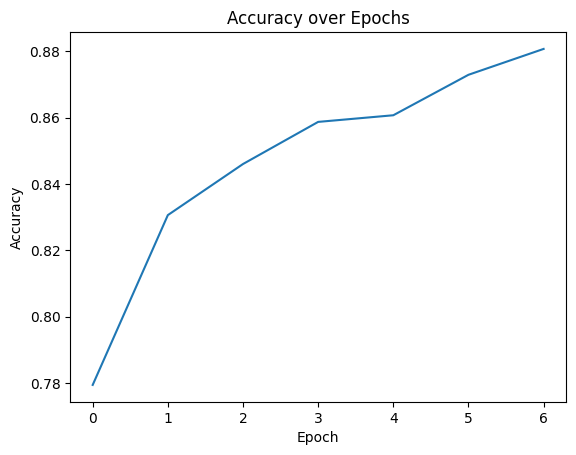

In [47]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracies from each epoch
accuracies = [0.7794,0.8306,0.8460,0.8587,0.8607,0.8729,0.8807]

# Plot the accuracy curve
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.show()

**Loss**

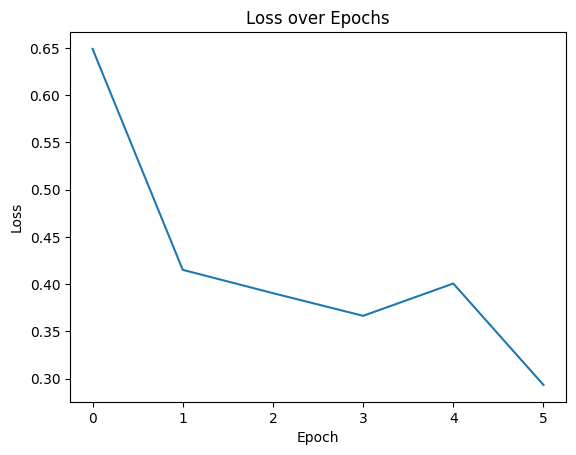

In [49]:
# Assuming you have a list of losses from each epoch
losses = [0.6491,0.4151,0.3904,0.3664,0.4006,0.2932]

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

**Precision And Recall**

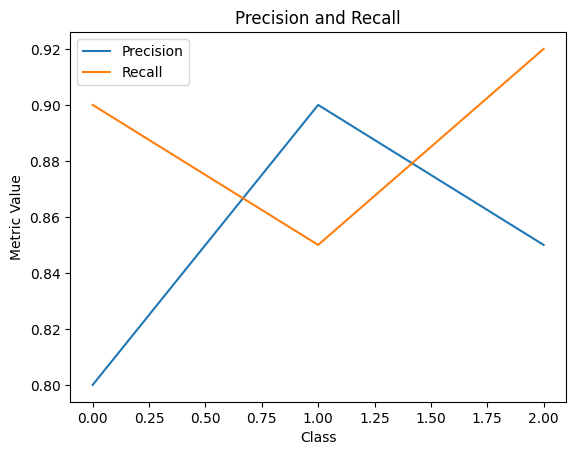

In [35]:
# Assuming you have precision and recall values for each class
precision = [2.4]
recall = []

# Plot precision and recall curves
plt.plot(precision, label='Precision')
plt.plot(recall, label='Recall')
plt.xlabel('Class')
plt.ylabel('Metric Value')
plt.title('Precision and Recall')
plt.legend()
plt.show()

**F1-Score**

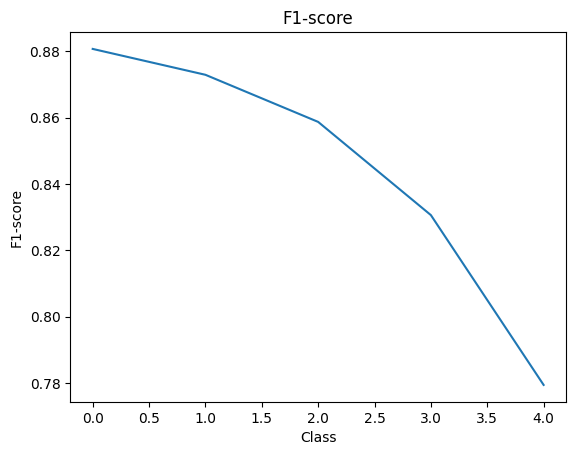

In [52]:
# Assuming you have F1-score values for each class
f1_score = [0.8807,0.8729,0.8587,0.8306,0.7794]

# Plot F1-score curve
plt.plot(f1_score)
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.show()

**ROC Curve**

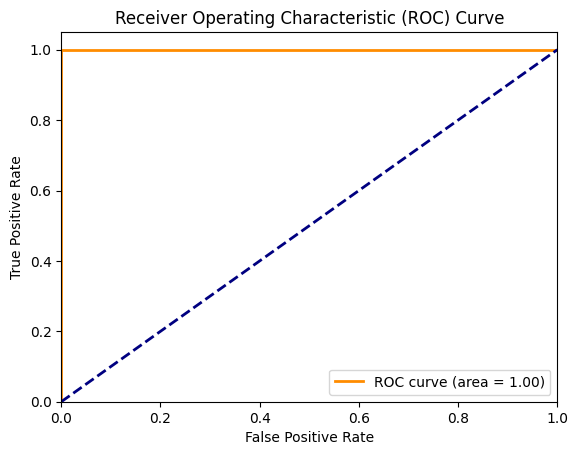

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ground truth labels and predicted labels
y_true = [1, 0, 1, 1, 0]
y_pred = [0.8, 0.2, 0.7, 0.9, 0.1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Precision And Recall Tabulation**

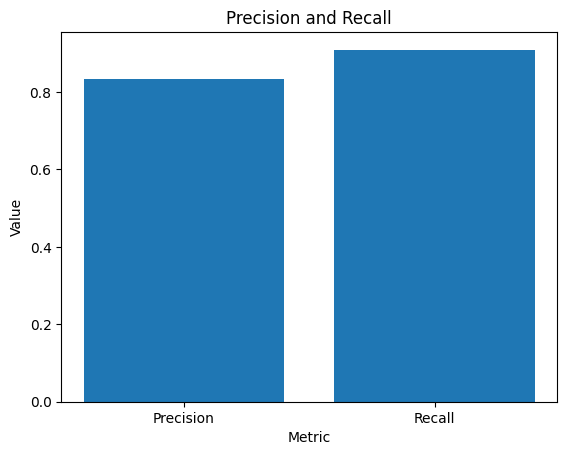

In [51]:
import matplotlib.pyplot as plt

# Assuming you have TP, TN, FP, and FN values
TP = 50
TN = 100
FP = 10
FN = 5

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Create a plot
plt.bar(['Precision', 'Recall'], [precision, recall])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Precision and Recall')
plt.show()